# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Вы предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузите данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv. Если работаете локально, скачать файл можно по ссылке.

Проверьте наличие дубликатов в идентификаторах пользователей. Сравните размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Москвы проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Проверка гипотезы: кто читает чаще - жители Спб или Мск

- Автор:Станишевская Ю.Л.
- Дата:18.05.2025

## Цели и задачи проекта



**Цель:** Проверка статистической гипотезы о том, что жители СПБ чаще читают/слушают книги, чем жители Мск

**Задачи:**
- 1. Загрузка и предобработка данных
- 2. Проанализировать распределение данных
- 3. Проверить гипотезу
- 4. Сформулировать аналитическую записку и сделать выводы.


## Описание данных



**Данные**

https://code.s3.yandex.net/datasets/ab_test_participants.csv — таблица участников тестов.


Структура файла:

- user_id — идентификатор пользователя;
- group — группа пользователя;
- ab_test — название теста;
- device — устройство, с которого происходила регистрация.


https://code.s3.yandex.net/datasets/ab_test_events.zip — архив с одним csv-файлом, в котором собраны события 2020 года;


Структура файла:

- user_id — идентификатор пользователя;
- event_dt — дата и время события;
- event_name — тип события;
- details — дополнительные данные о событии.

https://code.s3.yandex.net/datasets/yandex_knigi_data.csv - таблица с активностью пользователей из СПБ и Мск:

Структура файла:

- city - город
- puid - идентификатор пользователя
- hours - сумма часов проведенных за книгой (любой)

## Содержимое проекта

* [1. Загрузка и знакомство с данными](#ch1)

* [2. Подготовка данных](#ch2)

* [3. Проверка гипотезы в Python](#ch3)

* [4. Аналитическая записка](#ch4)

* [5. Итоговый вывод и рекомендации](#ch5)

* [6. Итоговый вывод и рекомендации](#ch6)

<a class='anchor' id="ch1"></a>

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import os

In [2]:
pth1 = '/datasets/yandex_knigi_data.csv'
pth2 = 'yandex_knigi_data.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Файл с данными не найден')

In [3]:
df.head()  # вывод первых строк для проверки

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [4]:
df.info()  # проверка типов и пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


In [5]:
# Проверка дубликатов
duplicates = df[df.duplicated(subset=['puid'], keep=False)]  # все дубликаты (не только первые/последние)
unique_duplicates_count = duplicates['puid'].nunique()  # количество уникальных дублируемых ID
total_duplicates_count = duplicates.shape[0]  # общее количество дубликатов (всех записей)

print(f"Количество уникальных дубликатов (puid): {unique_duplicates_count}")
print(f"Общее количество дубликатов (всех записей): {total_duplicates_count}")

Количество уникальных дубликатов (puid): 244
Общее количество дубликатов (всех записей): 488


In [6]:
duplicates['city'].value_counts()

Санкт-Петербург    244
Москва             244
Name: city, dtype: int64

In [7]:
df[df.duplicated(keep=False)]

,Unnamed: 0,city,puid,hours


In [8]:
df['city'].value_counts() #проверка имеются ли в данных другие города и какое распределение по выборкам

Москва             6234
Санкт-Петербург    2550
Name: city, dtype: int64

In [9]:
df.groupby('city')['hours'].describe() #проверка как распределяется значение времени по городам

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Москва,6234.0,10.881092,36.851683,0.000018,0.059903,0.924498,5.939972,857.209373
Санкт-Петербург,2550.0,11.592691,39.704993,0.000025,0.080002,0.984781,6.509072,978.764775


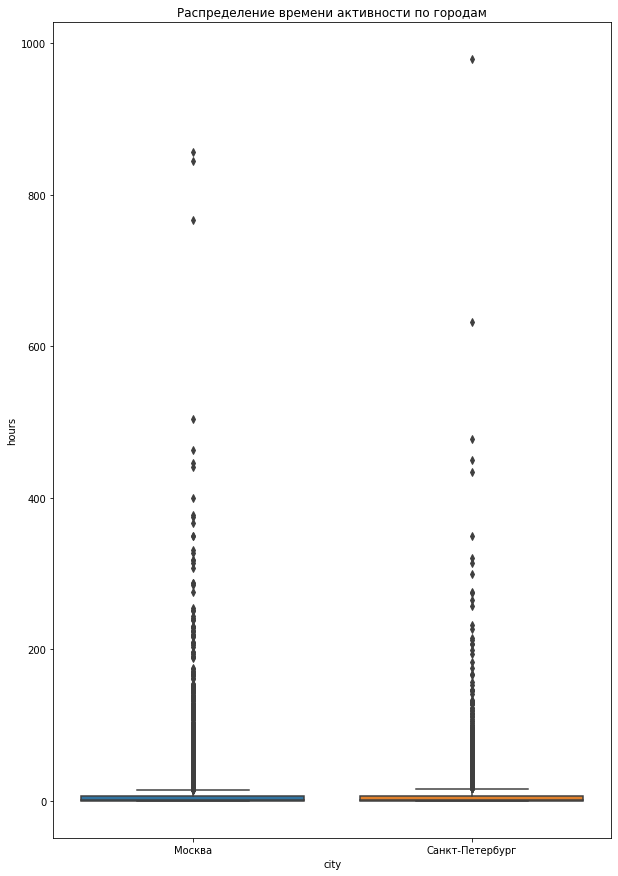

In [10]:
plt.figure(figsize=(10, 15))
sns.boxplot(x='city', y='hours', data=df)
plt.title('Распределение времени активности по городам')
plt.show()

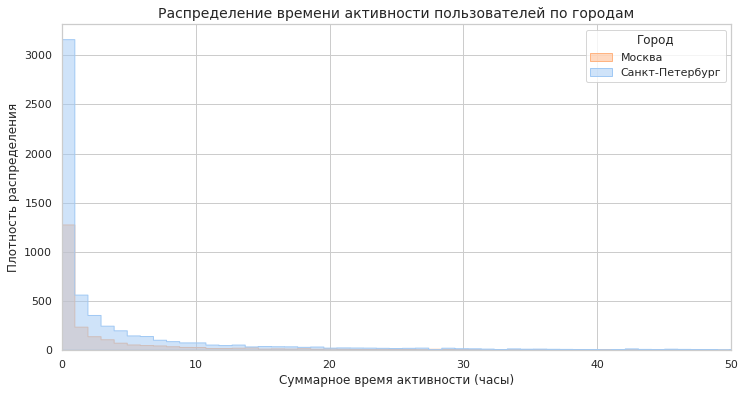

In [11]:

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='hours',
    hue='city',
#    kde=True,          # Добавить KDE-линию
    element="step",     # Четкие границы столбцов
#    stat="density",     # Нормировка по плотности
#    common_norm=False,  # Разные шкалы для городов
    alpha=0.5,         # Прозрачность
    bins=1000            # Число бинов
)

plt.xlim(0, 50)  
plt.title('Распределение времени активности пользователей по городам', fontsize=14)
plt.xlabel('Суммарное время активности (часы)', fontsize=12)
plt.ylabel('Плотность распределения', fontsize=12)
plt.legend(title='Город', labels=['Москва', 'Санкт-Петербург'])


plt.show()

**Вывод по главе**

Размер выборок в Мск и Спб сильно отличается - 6234 против 2550. Пользователей из Москвы больше более чем в 2 раза. Также в данных встречаются дубликаты по id пользователя - 244 штуки (это пользователи что встречаются в выборке и по Мск и по СПБ) - это довольно значительное количество человек для выборки Спб. По правилу A/B тестов выборки не должны пересекаться, а также должны быть примерно одинакового размера. поэтому хорошо бы почистить данные перед тестированием.

Несмотря на отличие в выборках, распределение активности пользователей по городам схожи - оба имеют резко левостороннее смещение. Медианы у данных проктически схожи - МСК (0.924498 ч), СПБ(0.984781 ч). Нижние границы основного разброса данных (25 персентиль), также не сильно отличаются - 0.06ч против 0.08ч, а вот верхние (75 персентиль) отличаются значительно - 5.939972 против 6.509072 (практически пол часа).

Ну и важно отметить, что распределения по обеим выборкам не нормальное.

<a class='anchor' id="ch2"></a>
## 2. Подготовка данных к  A/B-тесту

In [12]:
df_clean = df.drop_duplicates(subset=['puid'], keep=False)
df_clean

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434
...,...,...,...,...
8778,8778,Санкт-Петербург,1130000027468068,5.879444
8780,8780,Санкт-Петербург,1130000030307246,45.069222
8781,8781,Санкт-Петербург,1130000038726322,0.211944
8782,8782,Санкт-Петербург,1130000047892100,4.311841


In [13]:
city_counts = df_clean['city'].value_counts()
print("Исходное распределение:")
print(city_counts)

# Определяем город с меньшим количеством записей (целевой размер)
target_size = min(city_counts)
major_city = city_counts.idxmax()  # город, который нужно уменьшить

if city_counts[major_city] > target_size:
    # Получаем индексы записей основного города
    major_city_indices = df_clean[df_clean['city'] == major_city].index
    
    # Случайно выбираем записи для удаления
    rng = np.random.default_rng(42)  # для воспроизводимости
    indices_to_drop = rng.choice(
        major_city_indices, 
        size=len(major_city_indices) - target_size,
        replace=False
    )
    
    # Удаляем выбранные строки
    df_balanced = df_clean.drop(indices_to_drop)
else:
    df_balanced = df_clean.copy()
df_balanced

Исходное распределение:
Москва             5990
Санкт-Петербург    2306
Name: city, dtype: int64


,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
8,8,Москва,647235,12.000076
10,10,Москва,778279,3.613502
11,11,Москва,842936,0.008611
...,...,...,...,...
8778,8778,Санкт-Петербург,1130000027468068,5.879444
8780,8780,Санкт-Петербург,1130000030307246,45.069222
8781,8781,Санкт-Петербург,1130000038726322,0.211944
8782,8782,Санкт-Петербург,1130000047892100,4.311841


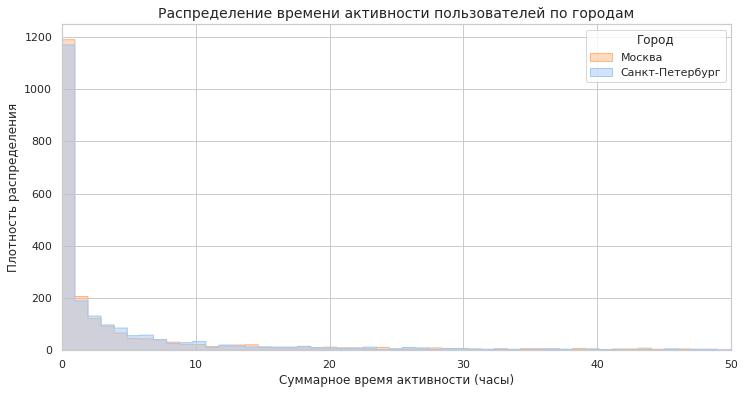

In [14]:

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df_balanced,
    x='hours',
    hue='city',
#    kde=True,          # Добавить KDE-линию
    element="step",     # Четкие границы столбцов
#    stat="density",     # Нормировка по плотности
#    common_norm=False,  # Разные шкалы для городов
    alpha=0.5,         # Прозрачность
    bins=1000            # Число бинов
)

plt.xlim(0, 50)  
plt.title('Распределение времени активности пользователей по городам', fontsize=14)
plt.xlabel('Суммарное время активности (часы)', fontsize=12)
plt.ylabel('Плотность распределения', fontsize=12)
plt.legend(title='Город', labels=['Москва', 'Санкт-Петербург'])


plt.show()

Выводы по главе:

Данные исходные были отфильтрованы:
-удалены дубликаты, оказалось что имеются пользователи, состоящие в 2х группах одновременно. От таких тестируемых надо избавиться т.к. они видели оба тестируемых варианта, следовательно могут исказить результаты теста.
-группы приведены в равновесное состояние, путем рандомного удаления из наибольшей группы участников.
-построены гистограммы распределения времени активности в обеих группах. Гистограмма имеет ненормальное распределение, она бимодальна и ассиметрична (вытянута вправо)

<a class='anchor' id="ch3"></a>
## 3. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [15]:

moscow = df_balanced[df_balanced['city'] == 'Москва']['hours']
spb = df_balanced[df_balanced['city'] == 'Санкт-Петербург']['hours']

print(f"Москва (n={len(moscow)}): Медиана = {moscow.median():.1f} ч")
print(f"СПб (n={len(spb)}): Медиана = {spb.median():.1f} ч")

Москва (n=2306): Медиана = 0.9 ч
СПб (n=2306): Медиана = 0.9 ч


In [16]:

print("Москва (нормальность): p =", stats.shapiro(moscow)[1])  # >0.05?
print("СПб (нормальность): p =", stats.shapiro(spb)[1])        # >0.05?

Москва (нормальность): p = 0.0
СПб (нормальность): p = 0.0


In [17]:
# U-тест Манна-Уитни (односторонний)
u_stat, p_value = stats.mannwhitneyu(spb, moscow, alternative='greater')
print(f"U-тест: p-value = {p_value:.4f}")

U-тест: p-value = 0.6102


Вывод по разделу

Тип выбранного теста - U-тест Манна-Уитни (непараметрический аналог t-теста). Данный тест был выбран т.к. тест Шапиро-Уилка показал p = 0.0 для обеих групп (p < 0.05), что отвергает гипотезу о нормальности распределения, поэтому и параметрический t-тест неприменим.
Выборки сбалансированны (равенство депрессий), выборки имеют не нормальное распределение. Нет оснований отвергать нулевую гипотезу, т.к. p-value больше 0.05.

<a class='anchor' id="ch4"></a>
## 4. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



Перед проведением теста выборки были сбалансированны - удалены дубликаты из обоих выборок, а также выборки были приведены к одной размерности путем удаления рандомных пользователей из наибольшей группы.
Для теста был выбран стандарнтный уровень значимости - 0.05
Тип выбранного теста - U-тест Манна-Уитни (непараметрический аналог t-теста). Данный тест был выбран т.к. тест Шапиро-Уилка показал p = 0.0 для обеих групп (p < 0.05), что отвергает гипотезу о нормальности распределения, поэтому и параметрический t-тест неприменим.

Результат теста :
p-value=0.6102 -> Различия между группами статистически не значимы (p > 0.05)
Медианное время активности одинаково в обеих группах (0.9 часа).

Нулевая гипотеза не отвергается -> Нет статистически значимых доказательств, что пользователи из Санкт-Петербурга проводят больше времени в приложении, чем пользователи из Москвы.


<a class='anchor' id="ch5"></a>
## 5. Итоговый вывод и рекомендации

На текущих данных гипотеза не подтвердилась. Для более глубоких выводов требуется расширить анализ.

Причины:
- Использование одинаковых приложений 
- "замыливание" результатов из-за отсутствия детализации 

Рекомендации:
- Возможно, стоит дополнительно разбивать пользователей по возрасту и/или по контенту
- Думаю, можно также сегментировать пользователей по наличию/отсутствия подписок в приложениях


----

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



**Цели исследования**

- Оценить, увеличивает ли новая версия сайта конверсию в покупки по сравнению со старой версией.
- Проверить корректность проведения теста (равномерность распределения, отсутствие пересечений).
- Определить, есть ли статистически значимые различия между группами.
- Выявить потенциальные проблемы в данных.



## 2. Загрузите данные, оцените их целостность.


In [18]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [19]:
print("Участники теста:")
print(participants.head())


Участники теста:
            user_id group                  ab_test   device
0  0002CE61FF2C4011     B        interface_eu_test      Mac
1  001064FEAAB631A1     B  recommender_system_test  Android
2  001064FEAAB631A1     A        interface_eu_test  Android
3  0010A1C096941592     A  recommender_system_test  Android
4  001E72F50D1C48FA     A        interface_eu_test      Mac


In [20]:
participants.info()  # Проверка на пропуски и типы данных
print("Уникальных пользователей:", participants['user_id'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB
Уникальных пользователей: 13638


In [21]:
participants = participants.drop_duplicates(subset=['user_id'], keep=False)
participants

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac
5,002412F1EB3F6E38,B,interface_eu_test,Mac
6,002540BE89C930FB,B,interface_eu_test,Android
...,...,...,...,...
14518,FFE5B14BD55C1C5C,A,interface_eu_test,PC
14519,FFE600EEC4BA7685,B,interface_eu_test,Android
14520,FFE7FC140521F5F6,A,interface_eu_test,PC
14521,FFEFC0E55C1CCD4F,A,interface_eu_test,PC


In [22]:
print("\nСобытия:")
print(events.head())


События:
            user_id            event_dt                        event_name  \
0            GLOBAL 2020-12-01 00:00:00  End of Black Friday Ads Campaign   
1  CCBE9E7E99F94A08 2020-12-01 00:00:11                      registration   
2            GLOBAL 2020-12-01 00:00:25                      product_page   
3  CCBE9E7E99F94A08 2020-12-01 00:00:33                             login   
4  CCBE9E7E99F94A08 2020-12-01 00:00:52                      product_page   

       details  
0  ZONE_CODE15  
1          0.0  
2          NaN  
3          NaN  
4          NaN  


In [23]:
events.info()  # Проверка дат и типов событий
print("Уникальных событий:", events['event_name'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB
Уникальных событий: ['End of Black Friday Ads Campaign' 'registration' 'product_page' 'login'
 'product_cart' 'purchase' 'Start of Christmas&New Year Promo'
 'Start of CIS New Year Gift Lottery']


## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [24]:
# Фильтрация участников целевого теста (interface_eu_test)
target_test_participants = participants[participants['ab_test'] == 'interface_eu_test']

print("Уникальные группы в тесте:", target_test_participants['group'].unique())



Уникальные группы в тесте: ['B' 'A']


Распределение по группам:
 B    5011
A    4952
Name: group, dtype: int64


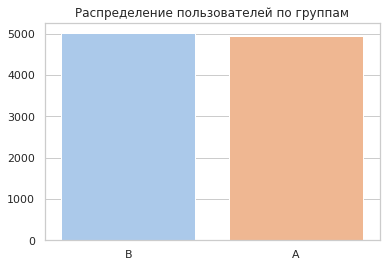

Тест на равномерность: p-value = 0.554


In [25]:


# Распределение пользователей по группам
group_counts = target_test_participants['group'].value_counts()
print("Распределение по группам:\n", group_counts)


plt.figure(figsize=(6, 4))
sns.barplot(x=group_counts.index, y=group_counts.values)
plt.title("Распределение пользователей по группам")
plt.show()

# Проверка равномерности (хи-квадрат)
chi2_stat, p_value = stats.chisquare(group_counts)
print(f"Тест на равномерность: p-value = {p_value:.3f}")

In [26]:
# Пользователи, участвующие в нескольких тестах
user_test_counts = participants.groupby('user_id')['ab_test'].nunique()
dublicated = user_test_counts[user_test_counts > 1].index

print("Количество пересечений:", len(dublicated))


Количество пересечений: 0


3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [27]:
target_user_ids = participants[participants['ab_test'] == 'interface_eu_test']['user_id'].unique()

test_events = events[events['user_id'].isin(target_user_ids)].copy()

print(f"Всего событий в тесте: {len(test_events)}")
print(f"Уникальных пользователей с событиями: {test_events['user_id'].nunique()}")

Всего событий в тесте: 73815
Уникальных пользователей с событиями: 9963


In [28]:
test_events['event_date'] = test_events['event_dt'].dt.date

# Анализ временного охвата
print("Период проведения теста:")
print(f"Начало: {test_events['event_date'].min()}")
print(f"Конец: {test_events['event_date'].max()}")
print(f"Дней тестирования: {test_events['event_date'].nunique()}")

Период проведения теста:
Начало: 2020-12-06
Конец: 2020-12-30
Дней тестирования: 25


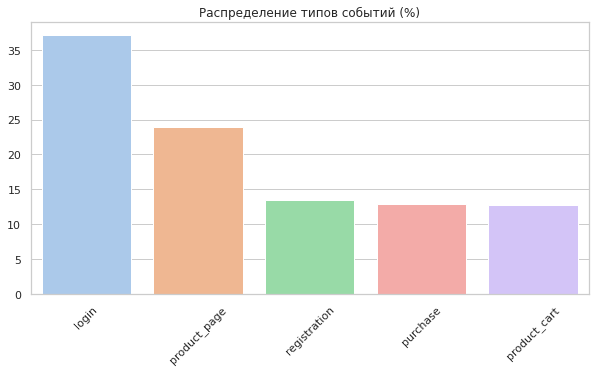

In [29]:
# Распределение событий по типам
event_distribution = test_events['event_name'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 5))
sns.barplot(
    x=event_distribution.index,
    y=event_distribution.values,
    order=event_distribution.index
)
plt.title("Распределение типов событий (%)")
plt.xticks(rotation=45)
plt.show()


In [30]:
# Добавляем информацию о группе
test_events = test_events.merge(
    participants[['user_id', 'group']],
    on='user_id',
    how='left'
)

# Анализ активности по группам
group_activity = test_events.groupby(['group', 'event_name']).size().unstack()
group_activity['total_events'] = group_activity.sum(axis=1)
group_activity = group_activity.T  # Транспонируем для удобства

print("Активность по группам:")
display(group_activity)

Активность по группам:


group,A,B
event_name,,
login,13523,13837
product_cart,4740,4651
product_page,8629,8985
purchase,3856,5631
registration,4952,5011
total_events,35700,38115


Выводы по главе:

Все события отфильтрованы и привязаны к участникам теста.
Период тестирования составляет 25 дне.
Распределение пользователей по группам практически одинаковое:
B    5011
A    4952
Распределение событий и пользователей между группами A и B практически одинаковое, есть небольшой перевес в группе B по количеству покупок (5631 против 3856).



- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [31]:
registration_times = events.groupby('user_id')['event_dt'].min().reset_index()
registration_times.columns = ['user_id', 'registration_dt']
events_with_reg = events.merge(registration_times, on='user_id')
events_with_reg['days_since_reg'] = (events_with_reg['event_dt'] - events_with_reg['registration_dt']).dt.days
print(events_with_reg[['user_id', 'event_dt', 'registration_dt','days_since_reg']].head(20))

   user_id            event_dt registration_dt  days_since_reg
0   GLOBAL 2020-12-01 00:00:00      2020-12-01               0
1   GLOBAL 2020-12-01 00:00:25      2020-12-01               0
2   GLOBAL 2020-12-01 00:03:02      2020-12-01               0
3   GLOBAL 2020-12-01 00:03:13      2020-12-01               0
4   GLOBAL 2020-12-01 00:06:01      2020-12-01               0
5   GLOBAL 2020-12-01 00:06:18      2020-12-01               0
6   GLOBAL 2020-12-01 00:06:31      2020-12-01               0
7   GLOBAL 2020-12-01 00:08:20      2020-12-01               0
8   GLOBAL 2020-12-01 00:09:14      2020-12-01               0
9   GLOBAL 2020-12-01 00:11:36      2020-12-01               0
10  GLOBAL 2020-12-01 00:13:18      2020-12-01               0
11  GLOBAL 2020-12-01 00:13:38      2020-12-01               0
12  GLOBAL 2020-12-01 00:14:28      2020-12-01               0
13  GLOBAL 2020-12-01 00:14:53      2020-12-01               0
14  GLOBAL 2020-12-01 00:15:22      2020-12-01         

In [32]:
events_7days = events_with_reg[events_with_reg['days_since_reg'] <= 7].copy()
print(f"Всего событий: {len(events_7days)}")
print(f"Уникальных пользователей: {events_7days['user_id'].nunique()}")
print("Распределение по дням:")
print(events_7days['days_since_reg'].value_counts().sort_index())

Всего событий: 695047
Уникальных пользователей: 144184
Распределение по дням:
0    518049
1     48689
2     33979
3     25809
4     20818
5     18243
6     15913
7     13547
Name: days_since_reg, dtype: int64


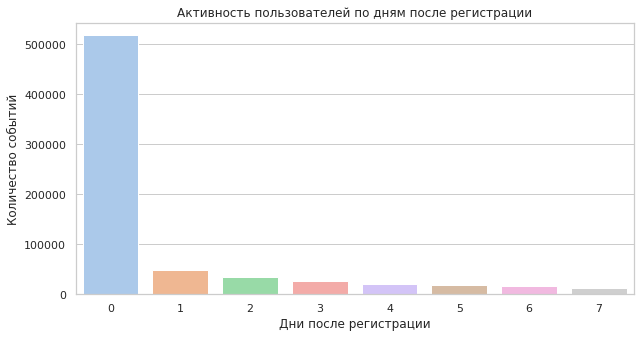

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(x='days_since_reg', data=events_7days)
plt.title('Активность пользователей по дням после регистрации')
plt.xlabel('Дни после регистрации')
plt.ylabel('Количество событий')
plt.show()

Вывод по главе:
Сильное смещение в распределение данных, многие пользователи снижают активность (значительно) после первого дня. 

Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [34]:


import statsmodels.stats.power as smp
from statsmodels.stats.proportion import proportion_effectsize

# Параметры теста
alpha = 0.05       # Уровень значимости 5%
power = 0.8        # Мощность теста 80%
cr0 = 0.3          # Базовая конверсия 30%
mde = 0.03         # Минимальный детектируемый эффект 1% (абсолютный)

# Расчет эффекта (Cohen's h)
effect_size = proportion_effectsize(cr0, cr0 + mde)

# Расчет требуемого размера выборки на группу
required_n = smp.tt_ind_solve_power(
    effect_size=effect_size,
    alpha=alpha,
    power=power,
    ratio=1.0       # Равные размеры групп
)

print(f"Требуется пользователей на группу: {int(required_n)}")
print(f"Общий размер выборки: {2 * int(required_n)}")

Требуется пользователей на группу: 3762
Общий размер выборки: 7524


- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [35]:

df = events_7days.merge(participants[['user_id', 'group']], on='user_id', how='inner')

In [36]:

total_visitors = df.groupby('group')['user_id'].nunique()
purchasing_visitors = df[df['event_name'] == 'purchase'].groupby('group')['user_id'].nunique()
results = pd.DataFrame({
    'Всего посетителей': total_visitors,
    'Совершили покупку': purchasing_visitors,
    'Конверсия (%)': (purchasing_visitors / total_visitors * 100).round(1)
})



print(results)

       Всего посетителей  Совершили покупку  Конверсия (%)
group                                                     
A                   7034               2020           28.7
B                   5717               1733           30.3


In [37]:
from statsmodels.stats.proportion import proportions_ztest

# Данные для теста
successes = [purchasing_visitors['B'], purchasing_visitors['A']]
nobs = [total_visitors['B'], total_visitors['A']]

# Двусторонний Z-тест
z_stat, p_value = proportions_ztest(successes, nobs, alternative='two-sided')

print(f"Z-статистика: {z_stat:.3f}, p-value: {p_value:.4f}")

Z-статистика: 1.966, p-value: 0.0493


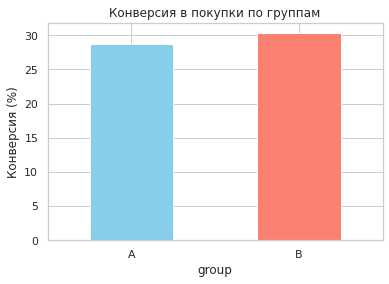

In [38]:


results['Конверсия (%)'].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Конверсия в покупки по группам')
plt.ylabel('Конверсия (%)')
plt.xticks(rotation=0)
plt.show()

- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

Выводы по главе: 

Z-статистика: 1.966, p-value: 0.0493 (< 0.05), разница статистически значима на уровне 5% (вероятность что результат случайный чуть менее 5%)


Тестовая группа B показала увеличение конверсии на 1.6 процентных пункта (с 28.7% до 30.3%). 
Размер групп различен, мб поэтому и количество покупок по итогу меньше.


In [39]:
conversion_rate = (purchasing_visitors / total_visitors * 100).round(2)
lift_pp = (conversion_rate['B'] - conversion_rate['A']).round(2)
print(f"Конверсия в контрольной группе: {conversion_rate['A']}%")
print(f"Конверсия в тестовой группе: {conversion_rate['B']}%")
print(f"\nУвеличение конверсии: +{lift_pp} п.п.")

Конверсия в контрольной группе: 28.72%
Конверсия в тестовой группе: 30.31%

Увеличение конверсии: +1.59 п.п.


## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

Нулевая гипотеза: конверсия не различается
Альтернативная: конверсия в группе В выше, чем в группе А

Цель теста -  Увеличить конверсию пользователей в покупку за счёт нового интерфейса сайта. Компания предполагает, что новый дизайн упростит навигацию и повысит количество завершённых покупок.

Группы:

- Контрольная группа (А): Пользователи, которые видят старый интерфейс сайта.

- Тестовая группа (В): Пользователи, взаимодействующие с новым интерфейсом.

Конверсия: В данном контексте — процент пользователей, совершивших хотя бы одну покупку.
Проверяем статистическую значимость различий в конверсии между группами. Если различие значимо, можно утверждать, что новый интерфейс действительно повлиял на поведение пользователей.

In [40]:
from statsmodels.stats.proportion import proportions_ztest

z_stat, p_value = proportions_ztest(successes, nobs, alternative='larger')

print(f"Z-статистика: {z_stat:.3f}")
print(f"p-value: {p_value:.4f}")

Z-статистика: 1.966
p-value: 0.0247


Отвергаем нулевую гипотезу

- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

Выводы по главе:

Так как p-value < уровня значимости (0.0247 < 0.05), мы отвергаем нулевую гипотезу. Различие в конверсии между тестовой и контрольной группами статистически значимо. Новый интерфейс оказал влияние на поведение пользователей.


Новая версия интерфейса увеличила конверсию на 1.59 п.п., что соответствует относительному росту примерно на 5.5%  ((1.59 / 28.72) * 100 ). Это значимое улучшение и при большом трафике улучшение интерфейса окупится за счет дополнительных покупок.

Для исключения долгосрочных рисков можно помониторить как изменится  конверсия с течением времени.

